In [1]:
import os
import cv2
import pickle 
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.applications.resnet50 import ResNet50
from keras.layers import Dense , Flatten , BatchNormalization , Dropout , Conv2D , MaxPooling2D

2024-02-03 11:44:08.434741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-03 11:44:11.174951: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data = tf.keras.utils.image_dataset_from_directory(
    directory='data',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(420,420),
    seed=42
)

Found 67799 files belonging to 7 classes.


2024-02-03 11:46:45.193968: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-03 11:46:45.561699: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-03 11:46:45.562266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-03 11:46:45.566352: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-03 11:46:45.566725: I tensorflow/compile

In [3]:
def process(image , label ):
    image = tf.cast( image/255 , tf.float32)
    return image , label 

train_ds = data.map(process)    

In [4]:
conv_base = ResNet50(
    weights='imagenet',
    include_top = False,
    input_shape=(420,420,3)
)

In [17]:
conv_base.layers[45].name

'conv3_block1_0_conv'

In [30]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'conv5_block1_1_conv':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad False
pool1_pool False
conv2_block1_1_conv False
conv2_block1_1_bn False
conv2_block1_1_relu False
conv2_block1_2_conv False
conv2_block1_2_bn False
conv2_block1_2_relu False
conv2_block1_0_conv False
conv2_block1_3_conv False
conv2_block1_0_bn False
conv2_block1_3_bn False
conv2_block1_add False
conv2_block1_out False
conv2_block2_1_conv False
conv2_block2_1_bn False
conv2_block2_1_relu False
conv2_block2_2_conv False
conv2_block2_2_bn False
conv2_block2_2_relu False
conv2_block2_3_conv False
conv2_block2_3_bn False
conv2_block2_add False
conv2_block2_out False
conv2_block3_1_conv False
conv2_block3_1_bn False
conv2_block3_1_relu False
conv2_block3_2_conv False
conv2_block3_2_bn False
conv2_block3_2_relu False
conv2_block3_3_conv False
conv2_block3_3_bn False
conv2_block3_add False
conv2_block3_out False
conv3_block1_1_conv False
conv3_block1_1_bn False
conv3_block1_1_relu False
conv3_block1_2_con

In [31]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='softmax'))


In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 14, 14, 2048)      23587712  
                                                                 
 flatten_2 (Flatten)         (None, 401408)            0         
                                                                 
 dense_12 (Dense)            (None, 128)               51380352  
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                      

In [33]:
model.compile(optimizer='Adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [34]:
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [35]:
history = model.fit( train_ds , epochs=20)

Epoch 1/20


/home/yash/.local/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1176: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)
2024-02-03 12:23:20.704714: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2024-02-03 12:23:20.906138: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

2024-02-03 12:23:21.217264: E tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:114] **

2119/2119 [==============================] - 517s 238ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 2/20
2119/2119 [==============================] - 503s 237ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 3/20
2119/2119 [==============================] - 503s 237ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 4/20
2119/2119 [==============================] - 503s 237ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 5/20
2119/2119 [==============================] - 505s 238ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 6/20
2119/2119 [==============================] - 510s 240ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 7/20
2119/2119 [==============================] - 510s 240ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 8/20
2119/2119 [==============================] - 515s 243ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 9/20
2119/2119 [==============================] - 518s 244ms/step - loss: 0.0000e+00 - accuracy: 0.0487
Epoch 10/20
2119/2119

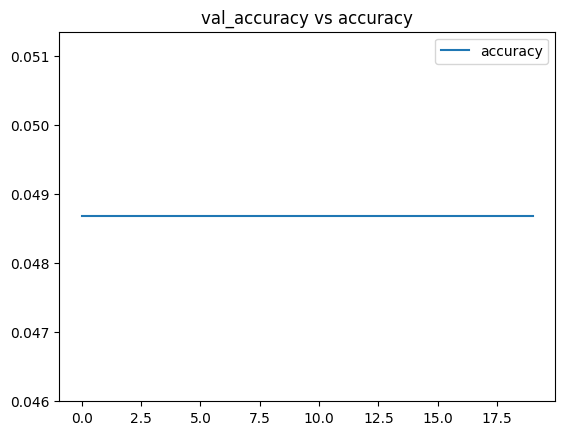

In [37]:
# plt.plot(history.history['val_accuracy'] , 'red' , label='val_accuracy' )
plt.plot(history.history['accuracy'] , label='accuracy')
plt.title('val_accuracy vs accuracy')
plt.legend()

In [39]:
pickle.dump(model , open('mode.pkl' , 'wb'))

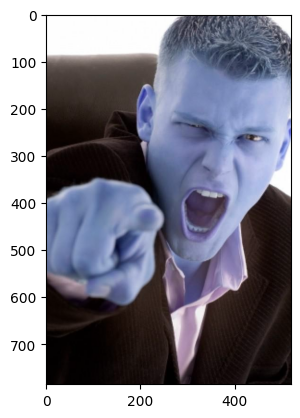

In [45]:
Image = cv2.imread('amazed_boss_302.jpg')
plt.imshow(Image)

In [46]:
Image = cv2.resize(Image,(420,420))
output = model.predict(Image.reshape((1,420,420,3)))
output

1/1 [==============================] - 0s 43ms/step


array([[1.]], dtype=float32)